In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [67]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [69]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [70]:
num_cols=['age','heart_disease','bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'hypertension']
cat_cols=['gender', 'smoking_history']
cat_cols=df.select_dtypes(include='object').columns.tolist()
num_cols=df.select_dtypes(exclude='object').columns.tolist()

In [71]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoder.fit(df[cat_cols])
encoded_cols=pd.DataFrame(encoder.transform(df[cat_cols]).toarray(),columns=encoder.get_feature_names_out())
df=pd.concat([df,encoded_cols],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   gender                       100000 non-null  object 
 1   age                          100000 non-null  float64
 2   hypertension                 100000 non-null  int64  
 3   heart_disease                100000 non-null  int64  
 4   smoking_history              100000 non-null  object 
 5   bmi                          100000 non-null  float64
 6   HbA1c_level                  100000 non-null  float64
 7   blood_glucose_level          100000 non-null  int64  
 8   diabetes                     100000 non-null  int64  
 9   gender_Female                100000 non-null  float64
 10  gender_Male                  100000 non-null  float64
 11  gender_Other                 100000 non-null  float64
 12  smoking_history_No Info      100000 non-null  float64
 13  

In [72]:
from sklearn.preprocessing import minmax_scale
df[num_cols]=minmax_scale(df[num_cols])

In [73]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,0.523096,0.07485,0.039420,0.202040,0.368638,0.263900,0.085000,0.585520,0.414300,0.000180,0.358160,0.092860,0.040040,0.093520,0.35095,0.06447
std,0.281742,0.26315,0.194593,0.077460,0.194668,0.185037,0.278883,0.492635,0.492603,0.013415,0.479462,0.290238,0.196054,0.291161,0.47727,0.24559
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.299299,0.00000,0.000000,0.158964,0.236364,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,0.537037,0.00000,0.000000,0.202031,0.418182,0.272727,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,0.749750,0.00000,0.000000,0.228408,0.490909,0.359091,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


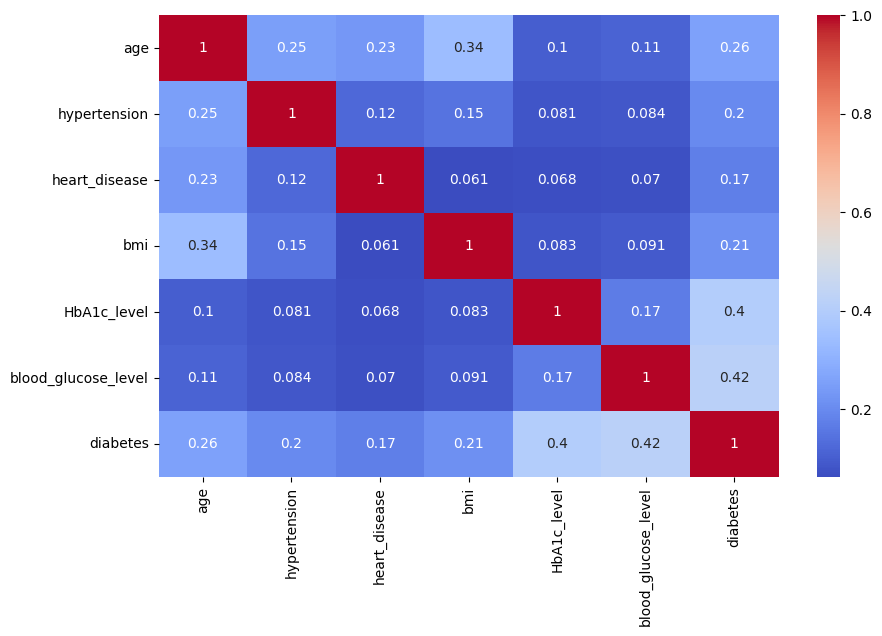

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(),annot=True,cmap='coolwarm')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
x=df[['gender', 'age', 'hypertension', 'diabetes', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']]
y=df[['heart_disease']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder

# Assuming 'x' is your feature DataFrame
ohe = OneHotEncoder(handle_unknown='ignore')
x_encoded = ohe.fit_transform(x[['gender', 'smoking_history']])  # Apply one-hot encoding to categorical columns

# Convert sparse matrix to dense array if needed
x_encoded = x_encoded.toarray()

# Concatenate encoded features with numerical features
x_processed = np.concatenate((x_encoded, x[['age', 'hypertension', 'diabetes', 'bmi', 'HbA1c_level', 'blood_glucose_level']].values), axis=1)

# Split the data after preprocessing
x_train, x_test, y_train, y_test = train_test_split(x_processed, y, test_size=0.2, random_state=42)

mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)  # Now fit the model with preprocessed data
output_predicted = mlp_model.predict(x_test)
output_real = y_test


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,output_predicted)*100

96.205

In [ ]:
from google.colab import drive
drive.mount('/content/drive')